In [1]:
import json
import requests
from time import sleep
import pandas as pd
import numpy as np

import unicodedata
import string
import re
import random

In [2]:
#To see all strings instead of truncated
pd.set_option('display.max_colwidth', -1)

In [4]:
data.shape

(12295, 10)

In [39]:
data.to_pickle('bestbuydata.pkl')

# Load data file

In [3]:
data = pd.read_csv('iconicScrape/womens-shoes.csv')

In [4]:
data = pd.read_pickle('Iconic_Final.pkl')

In [5]:
data.drop(columns=['Page URL','Material', 'Care', 'Meta keywords'], inplace=True)

In [6]:
data.head()

,Category,Brand Name,Model Name,Description,Title,Meta description
0,Women/Shoes/Sandals,Novo,Silhouette,"Inspired by global trends, Novo offers a wide range of seasonal designs at reasonable price points. For a touch of polish in your weekend wardrobe, Silhouette is the perfect option! - Mock croc upper- Flat sole - Leather-look finish Upper: SyntheticInner: SyntheticOutsole: Synthetic",Silhouette by Novo Online | THE ICONIC | Australia,Buy Silhouette by Novo online at THE ICONIC. Free and fast delivery to Australia and New Zealand.
1,Women/Shoes/Sandals,Nine West,Gigi,"PLEASE NOTE: THE ICONIC IS UNABLE TO SHIP THIS PRODUCT TO NEW ZEALAND.Still designed in the heart of New YorkвЂ™s fashion district, Nine West is committed to balancing essential pieces with the season's iconic trends. A best seller this season, the Gigi Sandals, are a mule-like style with two cross over straps across the vamp. The Gigi Sandals are comfortable for any summer event.- Cross over straps- Comfortable footbed- Mule design- Heel height: 8.5cm- Man-made lining & sole",Gigi by Nine West Online | THE ICONIC | Australia,Buy Gigi by Nine West online at THE ICONIC. Free and fast delivery to Australia and New Zealand.
2,Women/Shoes/Heels,Novo,Montecristo,"Inspired by global trends, Novo offers a wide range of seasonal designs at reasonable price points. Montecristo is a classic staple block heel that will be the perfect finishing touch to any look. - Adjustable ankle strap- Stacked block heel- Leather-look finish- Heel Height: 8.5cm Upper: SyntheticInner: SyntheticOutsole: Synthetic",Montecristo by Novo Online | THE ICONIC | Australia,Buy Montecristo by Novo online at THE ICONIC. Free and fast delivery to Australia and New Zealand.
3,Women/Shoes/All thongs,Havaianas,Havaianas Slim - Women's,"Look to Havaianas for a pair of thongs you'll wear all Summer long. Updating a classic style, the pink-accented, black Havaianas Slim are perfect for beach ensembles. вЂ‹- Flexible Brazilian rubber Slip-on design Black shade; magenta pink wordmark Textured thong straps; embossed branding Grip textured sole",Havaianas Slim - Women's by Havaianas Online | THE ICONIC | Australia,Buy Havaianas Slim - Women's by Havaianas online at THE ICONIC. Free and fast delivery to Australia and New Zealand.
4,Women/Shoes/Heels,Tony Bianco,Serrah,"Tony Bianco is AustraliaвЂ™s leading fashion footwear brand that recognises that being an individual is the essence of true style. With a chic collection of classic and trend-driven shoes and accessories, the fashion-forward footwear label offers premium leather designs that will reward you season after season. Pick from classic black ankle boots, suede knee-high designs and polished leather stiletto styles, selecting styles that can be mixed and matched with your 24-hour wardrobe. - Smooth leather upper White Squared open toe Diagonal cross-toe straps extending to mid-foot 7cm hexagonal block heel",Serrah by Tony Bianco Online | THE ICONIC | Australia,Buy Serrah by Tony Bianco online at THE ICONIC. Free and fast delivery to Australia and New Zealand.


In [281]:
data.shape

(43212, 6)

# filter out no description entries

In [7]:
data.dropna(subset=['Description'],inplace=True)

# Decode Unicode

In [8]:
regex= '[^\s\d.a-zA-Z0-9\"\'\!\&\*\-\_\–\=\+\.]'
data.Description = data.Description.apply(lambda x: re.sub(regex, '', x),)
data.Title = data.Title.apply(lambda x: re.sub(regex, '', x),)
data['Model Name'] = data['Model Name'].apply(lambda x: re.sub(regex, '', x),)
data['Brand Name'] = data['Brand Name'].apply(lambda x: re.sub(regex, '', x),)

# look at random rows

In [17]:
randomrows = random.sample(range(len(data)), 10)

sample = data.iloc[randomrows]
sample

,Category,Brand Name,Model Name,Description,Title,Meta description,Features
92031,Men/Clothing/Shirts & Polos,Oxford,Islington Dobby Shirt,Add some style to your corporate wardrobe with the Oxford Islington_Dobby_Shirt. Crafted from compact cotton this regular fit shirt features a small collar and single button cuffs. Work this style back with your favourite suit or keep it smart casual with some slim chinos.,Islington Dobby Shirt by Oxford,Buy Islington Dobby Shirt by Oxford online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Length 79cm Size M- Navy colourway- Dobby weave- Regular fit- Small collar- Oxford engraved buttons- 100 cotton
77817,Men/Clothing/T-Shirts & Singlets,Wrangler,Looking Out SS Tee - Men's,Inject a splash of Wrangler's vintage-inspired aesthetic into your off-duty rotation with the distressed graphic-printed Looking Out SS Tee.,Looking Out SS Tee - Men's by Wrangler,Buy Looking Out SS Tee - Men's by Wrangler online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Length 73cm size medium- Regular fit- Pure cotton jersey brushed finish with distressed detailing natural stretch unlined slightly sheer under light- Creamy white shade- Ribbed crew neckline- Short sleeves- Vintage-look branding to left chest mustard and rust shade- Graphic print to back mustard rust cobalt emerald and red shades- Straight hem
2646,Women/Clothing/Skirts,Missguided,Split Leg High Waist Satin Maxi Skirt,Missguided makes a sweeping hemline undeniably sultry in the black Split_Leg_High_Waist_Satin_Maxi_Skirt.,Split Leg High Waist Satin Maxi Skirt by Missguided,Buy Split Leg High Waist Satin Maxi Skirt by Missguided online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Length 112cm size UK 8- Fitted waist flared towards hemline- Heavy satin lined waistband non-stretch opaque- Black- Ruched waistband long self ties- Wrap front with high split- Invisible back zip fastening
50096,Women/Accessories/Bags,Skinnydip,Make Up Bag,Featuring bonded seams and a durable water-resistant construction the Make_Up_Bag from Skinnydip will be a chic addition to your travel collection,Make Up Bag by Skinnydip,Buy Make Up Bag by Skinnydip online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Measurements H16cm x W20cm x D6cm- Water-resistant TPU construction durable- Transparent body with iridescent silver-toned trims- Top zip-around opening- Bonded seams
46844,Women/Accessories/Bags,Crumpler,Identity Tote,Identity_Tote by Crumpler is the perfect choice for anyone looking for an everyday bag that combines looks style and functionality. Featuring 20 litres of internal storage a 13 inch external laptop sleeve seven separate storage zones and weatherproof construction the Identity tote is perfect for school or work,Identity Tote by Crumpler,Buy Identity Tote by Crumpler online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Dimensions W 34cm x H 38cm x D 17cm- Indigo shade- 20 litres of storage- 13 inch padded laptop compartment suits 13 inch Macbook- Secure main buckle- 2 internal mesh pockets- Internal slip pocket with closure
28900,Women/Clothing/Tights,MOVEMAMI,Hamptons Leggings,Augment your workout regime wearing MOVEMAMI's smooth moisture-wicking and ultra-supportive Hamptons_Leggings,Hamptons Leggings by MOVEMAMI,Buy Hamptons Leggings by MOVEMAMI online at THE ICONIC. Free and fast delivery to Australia and New Zealand.,Length Inside Leg 48cm Front Rise 21cm Leg Opening 22cm size small Second-skin fit 34 length Smooth moisture-wicking performance fabric four-way stretch Black Wide supportive waistband panel pockets to sides and back Anti-irritation flat-lock seams Panel pockets to the side of thighs Reflective gold-toned spots to cuffs
56239,Women/Shoes/Running,adidas Performance,Edge Lux 3 - Women's,Featuring responsive cushioning and a high-grip outsole the Edge Lux 3 running shoes from adidas_Performance have been designed to help you unlock your 

# Remove shipping disclaimer

In [9]:
regex_string = '(PLEASE NOTE - THE ICONIC IS UNABLE TO SHIP THIS PRODUCT TO NEW ZEALAND[\. ]*)[\w]+'

In [10]:
data.Description = data.Description.apply(lambda x: re.sub(regex_string, '', x,))

# Removing newlines at start of descriptions

In [11]:
data = data.apply(lambda x: x.str.strip())

# Split out features from descriptions, by each document

In [12]:
data['Features']= ''

In [13]:
import re

errors = []
for index, row in data.iterrows():
    try:
        desc, feat = re.split('\.\s*-| Measurements:|[\.!,]\s*\\n[A-Z]\w+:|[\.!,]\s*-\\n|\s+-\s+[A-Z]\w+:|[\.!,]\s*\\n\s*',row['Description'], 1)
        data.at[index, 'Features'] = feat
        data.at[index, 'Description'] = desc
    except:
        errors.append(index) 

# Drop the description errors

In [14]:
len(errors)

768

In [17]:
data.shape

(11510, 7)

In [16]:
data = data.drop(labels=errors)

# Replacing newline chars in columns

In [18]:
data.replace(to_replace='\n', value=' ', inplace=True, regex=True)

# Removing 'Iconic' references in titles, meta, etc.

In [19]:
regex_string = 'Online | THE ICONIC | Australia'
data.Title = data.Title.apply(lambda x: re.sub(regex_string, '', x,))

In [20]:
regex_string = ' at THE ICONIC. Free and fast delivery to Australia and New Zealand.'
data.Title = data.Title.apply(lambda x: re.sub(regex_string, '. Fast delivery to Australia and New Zealand.', x,))

# Removing 'our model is wearing...' parts

In [21]:
for index, row in data.iterrows():
    if ' Our model is wearing' in row['Description']:
        data.at[index, 'Description']= row['Description'].split(' Our model is wearing')[0]

# Finding lengths of entire combined sequence, in order to filter out longest ones

In [22]:
lengths = pd.Series()
for index, row in data.iterrows():
    length = 0
    length += len(str(row['Category']))
    length += len(row['Brand Name'])
    length += len(row['Model Name'])
    length += len(row['Title'])
    length += len(row['Description'])
    length += len(row['Meta description'])
    length += len(row['Features'])
    lengths.loc[index] = length

lengths.head()

1    616
2    475
3    506
4    756
5    837
dtype: int64

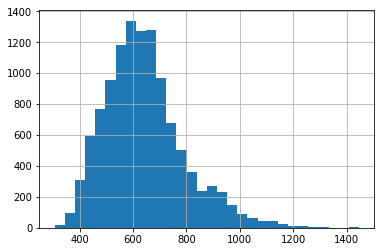

In [24]:
import matplotlib.pyplot as plt
import numpy as np

sortedlen = lengths.sort_values(ascending=False)

sortedlen.hist(bins=30)

In [25]:
toolongs = lengths[lengths>1500]
toolongs.head()

Series([], dtype: int64)

In [26]:
longindexes = list(toolongs.index.values)

In [27]:
data.drop(longindexes, inplace=True)

In [28]:
data.shape

(11510, 7)

# Save progress

In [20]:
data.to_pickle('Iconic_Final.pkl')

In [248]:
data.shape

(14050, 7)

# Merging datasets together

In [303]:
data = pd.read_pickle('Iconic_Womens_Clothing.pkl')
secondData = pd.read_pickle('Iconic_Womens_Accessories.pkl')
thirdData = pd.read_pickle('Iconic_Womens_Shoes.pkl')
fourthData = pd.read_pickle('Iconic_Mens_Accessories.pkl')
fifthData = pd.read_pickle('Iconic_Mens_Shoes.pkl')
sixthData = pd.read_pickle('Iconic_Mens_Clothing.pkl')

In [304]:
data = data.append(secondData, ignore_index = True)
data = data.append(thirdData, ignore_index = True)
data = data.append(fourthData, ignore_index = True)
data = data.append(fifthData, ignore_index = True)
data = data.append(sixthData, ignore_index = True)

In [305]:
data.shape

(94486, 7)

# Take out product-less descriptions

In [29]:
wrong = {}
for index, row in data.iterrows():
    if data.at[index, 'Model Name'].split(' - ')[0] not in row['Description']:
        #data.at[index, 'Description']= row['Description'].split(' Our model is wearing')[0]
#         print(row['Description'].split(' Our model is wearing')[0])
        wrong[index] = row['Description']
        
        
        print()
        print(index)
        print(row['Description'])
        print()


4
Tony Bianco is Australias leading fashion footwear brand that recognises that being an individual is the essence of true style. With a chic collection of classic and trend-driven shoes and accessories the fashion-forward footwear label offers premium leather designs that will reward you season after season. Pick from classic black ankle boots suede knee-high designs and polished leather stiletto styles selecting styles that can be mixed and matched with your 24-hour wardrobe


17
women who want to take glamorous-chic all the way to their feet look no further than Billini. The label draws inspiration from the latest runway trends to deliver a range of heels flats sandals and boots that channel the best of high-end fashion without the designer price tag


20
As one of Australias most iconic fashion brands with over 125 years of shoe making expertise Betts Shoes creates inspiring on-trend and great quality fashion for men at prices you will love. Find your perfect pair for any occasion

Undeniably one of the defining houses of the New York fashion world DKNY was founded in 1989 as an embodiment of Donna Karans commitment to creating for the modern woman. The brand has always boasted a deep understanding of the needs of a contemporary lifestyle and the challenges of balancing work and play. The footwear and accessories range is an extension of the labels spirit of individuality with attitude


797
With an unwavering mission to celebrate originality sports lifestyle giant adidas Originals recognises its rich sporting heritage and combines it with contemporary style codes to inspire all in their everyday lives. A seamless mix of technical prowess and street-ready design has helped to cement the status of the adidas Originals brand as an icon around the globe. With Trefoil logo tees sweats and outerwear sitting alongside an inimitable sneaker edit adidas Originals is the backbone of any off-duty rotation


800
Make the latest fashion trends all your own with Australian la

1520
over twenty years ago Skechers delivers comfortable stylish sneakers and casual shoes to meet the needs of an on-the-go lifestyle. A market leader in lifestyle footwear Skechers combines innovative sporting technologies with premium fabrications and design elements to create a range of footwear that works for performance and leisure alike


1521
Nicknamed the shoes with the beautiful fit footwear company Naturalizer have been committed to making women's shoes that look as good as they feel since 1927. Each pair whether it be ballet flats loafers or heeled pumps are fashion-forward and feminine while still providing the perfect fit and long-lasting comfort. Naturalizer understand that womens feet come in different shapes which is why they offer hard-to-find sizes in every collection


1522
For shoes developed sustainably without compromising on style we love Veja. The brand produces a wide range of sneakers through their supply chain that respects both humans and the environment wi

2175
Swedish-based shoemakers Vagabond prove that sustainability and premium style dont have to be mutually exclusive. Since its inception in the late 1960s the brand has cultivated a rich heritage for timeless design and artisanal craftsmanship with a focus on reducing consumption and creating footwear designed to go the distance. From boots crafted from the highest quality natural leathers to go-everywhere sneakers polished ballet flats brogues and everything in between our range of Vagabond shoes will have you well-heeled all year round


2182
Proudly Australian and family-owned Sandler shoes have been worn and enjoyed by millions of women establishing it as an iconic fashion brand. Sandler offers a broad range of contemporary looks that have the perfect balance between fashion direction exceptional quality and consistent fitting. Timelessly stylish look to the brand for well-crafted shoes and accessories


2183
For modern designs and on-trend silhouettes look no further than Austra

2992
A vibrant platform for young and chic female footwear and accessories Rubi has established itself as the cheeky trend-obsessed darling of the internationally-recognisable Cotton On Group. From leather-look boots and ballet flats to sporty slides and fresh sneakers a Rubi-heavy shoe collection is guaranteed to cover all occasions seasons and moods


2993
For footwear and accessories that stand the test of time look no further than ALDO. The brand reinvents classic designs with a contemporary twist and combines exceptional craftsmanship with premium materials and an eye for detail


2994
Exuding Parisian insouciance French label Jonak craft quality footwear for the contemporary sartorialist. Blending timeless silhouettes with contemporary tweaks Jonak is always on-trend with an array of beautifully crafted sandals leather boots and thoughtfully design loafers and Oxfords


2995
Australian label Caverley bring a sleek edge to any footwear rotation with their quality-made leather slid

3641
Renowned for feminine style and accessibility Dorothy Perkins footwear collection is paving the way forward with affordable and fashionable shoes rolled into one. Ranging from very chic corporate-friendly pumps to softer faux suede sandals Dorothy Perkins has all the ballet flats ankle boots and Mary-Jane stilettos you need to achieve inimitable style and untouchable self-confidence


3645
Make the latest fashion trends all your own with Australian label Dazie. Designed with young women in mind every collection offers affordable pieces inspired by the street style set that will take you from dawn til dusk and beyond. From floral dresses to crop tops and covetable footwear too you'll find everything your wardrobeand your next night outneeds from Dazie


3646
Rollie shoes are designed with the adventurous in mind. Crafted from super-lightweight EVA soles and premium materials including hand-finished nubuck and soft leathers Rollie shoes will let you run jump shop and even ride a bik

4341
Celebrated for its affordability and on-trend collections SPURR is designed for the style-savvy shoeaholic. Launched in 2011 the brand stepped into the fashion industry and was quickly recognised for its value and contemporary designs. From summer sandals to killer boots SPURR shoes will add versatility to your wardrobe and elevate any ensemble


4348
Make the latest fashion trends all your own with Australian label Dazie. Designed with young women in mind every collection offers affordable pieces inspired by the street style set that will take you from dawn til dusk and beyond. From floral dresses to crop tops and covetable footwear too you'll find everything your wardrobeand your next night outneeds from Dazie


4350
Combining style and comfort in footwear like never before Easy Steps create shoes that youll be delighted to wear day in and day out. For more than 20 years the brand have been crafting designs that couple outstanding comfort superior underfoot relief and extra toe 

5156
From the release of their first shoe in 1990 ROC Boots Australia have since evolved a unique street footwear culture of its own. Determined to offer the market something new and different the ROC Boots Australia team take influence and inspiration from music street style and vintage youth culture


5157
Rollie shoes are designed with the adventurous in mind. Crafted from super-lightweight EVA soles and premium materials including hand-finished nubuck and soft leathers Rollie shoes will let you run jump shop and even ride a bike in style without the heaviness of a regular shoe


5158
Swedish-based shoemakers Vagabond prove that sustainability and premium style dont have to be mutually exclusive. Since its inception in the late 1960s the brand has cultivated a rich heritage for timeless design and artisanal craftsmanship with a focus on reducing consumption and creating footwear designed to go the distance. From boots crafted from the highest quality natural leathers to go-everywher

Rollie shoes are designed for the creative and curious adventure seekers of the world. Super-lightweight EVA soles add a spring to every step and premium materials such as hand-finished nubuck and soft leathers mould to your feet for next level comfort. Weighing less than a pair of bananas Rollie shoes will allow you to run jump shop and even ride a bike in style while being an enemy of gravity


5981
For footwear and accessories that stand the test of time look no further than ALDO. The brand reinvents classic designs with a contemporary twist and combines exceptional craftsmanship with premium materials and an eye for detail


5982
With over forty years of history at the heart of youth culture Californian-based Vans has remained one of the most iconic streetwear brands on the market. With everything from the Authentic and Old-Skool sneakers alongside an extensive range of tees basics and accessories Vans has every corner of your weekend wardrobe covered


5985
Refresh your footwear r

6778
With designs to match every mood and outfit look to The Mode Collective for a modern twist on classic style. Mode Collective designs show off a versatile range of everything from elegant slingbacks and points to perfectly tough ankle boots and chic block heels in deep earthy hues and modern metallics


6779
With over 100 years of shoemaking experience Italian footwear icon Superga is a staple in any well-edited shoe collection. With their signature 2750 sneaker alongside of-the-moment flatforms and high-top trainers rendered in canvas and leather theres a perfect pair for every style profile


6781
Attitude and innovation have always been at the heart of the Schutz lifestyle. Their mission To deliver an unforgettable experience that combines design quality and freedom of expression in a range of beautiful footwear. With everything from supple leather sandals to pumps mules and ankle boots theres a Schutz pair to suit every style profile


6782
PLEASE NOTE THE ICONIC IS UNABLE TO S

7476
Encompassing the latest Australian and European trends Nina Armando offers women comfortable shoes with a sophisticated edge. From delicate flats to striking high heels turn to Nina Armando to add an air of elegance and exclusivity to your shoe collection


7479
Encompassing the latest Australian and European trends Nina Armando offers women comfortable shoes with a sophisticated edge. From delicate flats to striking high heels turn to Nina Armando to add an air of elegance and exclusivity to your shoe collection


7480
Proudly Australian and family-owned Sandler shoes have been worn and enjoyed by millions of women establishing it as an iconic fashion brand. Sandler offers a broad range of contemporary looks that have the perfect balance between fashion direction exceptional quality and consistent fitting. Timelessly stylish look to the brand for well-crafted shoes and accessories


7485
Combining style and comfort in footwear like never before Easy Steps create shoes that youll 

8249
Encompassing the latest Australian and European trends Nina Armando offers women comfortable shoes with a sophisticated edge. From delicate flats to striking high heels turn to Nina Armando to add an air of elegance and exclusivity to your shoe collection


8250
Mollini is an Australian label dedicated to creating unique innovative fashion-forward footwear. With looks inspired by the streets of Europe and international fashion runways Mollini have buyers who travel the world searching for the hottest shoe trends and looks to recreate with an accessible twist


8251
Lifestyle brand Onitsuka Tiger delivers designs grounded in Japanese heritage with a contemporary urban flair. The brands range of sneakers is renowned the world over with their signature Mexico 66 style sitting alongside collaborative efforts with like-minded artists


8252
Proudly Australian and family-owned Sandler shoes have been worn and enjoyed by millions of women establishing it as an iconic fashion brand. Sandl

9043
over twenty years ago Skechers delivers comfortable stylish sneakers and casual shoes to meet the needs of an on-the-go lifestyle. A market leader in lifestyle footwear Skechers combines innovative sporting technologies with premium fabrications and design elements to create a range of footwear that works for performance and leisure alike


9047
Attitude and innovation have always been at the heart of the Schutz lifestyle. Their mission To deliver an unforgettable experience that combines design quality and freedom of expression in a range of beautiful footwear. With everything from supple leather sandals to pumps mules and ankle boots theres a Schutz pair to suit every style profile


9049
Nicknamed the shoes with the beautiful fit footwear company Naturalizer have been committed to making women's shoes that look as good as they feel since 1927. Each pair whether it be ballet flats loafers or heeled pumps are fashion-forward and feminine while still providing the perfect fit and 

9781
The go-to for reliable comfort and fit every time Wide Steps take their tried and true range of flats heels and boots and give it an on-trend spin this season introducing notable metal detailing and metallic hues alongside the classic pairs that will be in high rotation in your collection all year round


9784
High Street icon TOPSHOP is a leader in delivering international trends with a design-led accessible focus. Launched in 1964 as a purveyor of young British designers the brand has evolved into a global fashion force and a champion of emerging talent. Today TOPSHOP designs and creates an extensive collection of shoes jewellery and accessories for the trend-savvy woman with everything from statement bags and street-ready sneakers to oversized hoop earrings and vintage-inspired jewellery under the Freedom at TOPSHOP moniker


9786
Exuding Parisian insouciance French label Jonak craft quality footwear for the contemporary sartorialist. Blending timeless silhouettes with contempo

10571
and dreaming of an endless summer Alohas Sandals stem from the depths of Spain where their artful sandals and dreamy espadrilles are handcrafted to perfection with the dedication of a team based in Barcelona. The brand offers an affordable collection that is often characterised by an effortless aesthetic and refined creative flair. They will be on high rotation in your wardrobe as the warmer weather approaches and guarantee you will feel feminine and powerful when donning a pair


10578
With designs to match every mood and outfit look to The Mode Collective for a modern twist on classic style. Mode Collective designs show off a versatile range of everything from elegant slingbacks and points to perfectly tough ankle boots and chic block heels in deep earthy hues and modern metallics


10580
Being true to your style is a roadmap to being true to yourself and female footwear label RAYE invites you on a spiritual journey to liberate yourself with confidence-boosting female-empowerin



11306
Encompassing the latest Australian and European trends Nina Armando offers women comfortable shoes with a sophisticated edge. From delicate flats to striking high heels turn to Nina Armando to add an air of elegance and exclusivity to your shoe collection


11309
For footwear thats innovative bold and daring look no further than global icon Steve Madden. The brand has garnered a cult following thanks to its signature chunky silhouettes fused with inspirations drawn from rock music and the designers New York roots. With everything from flatform sneakers and sandals to go-anywhere leather boots youre bound to find your next statement pair with Steve Madden


11311
Proudly Australian and family-owned Sandler shoes have been worn and enjoyed by millions of women establishing it as an iconic fashion brand. Sandler offers a broad range of contemporary looks that have the perfect balance between fashion direction exceptional quality and consistent fitting. Timelessly stylish look to t

12038
Proudly Australian and family-owned Sandler shoes have been worn and enjoyed by millions of women establishing it as an iconic fashion brand. Sandler offers a broad range of contemporary looks that have the perfect balance between fashion direction exceptional quality and consistent fitting. Timelessly stylish look to the brand for well-crafted shoes and accessories


12039
Frequently spotted in top fashion magazines and on the red carpet NINA shoes are the epitome of glamour in footwear. Drawing inspiration from international catwalk trends the brand shows off a collection of effortlessly feminine pairs that will suit every event from long lunches to weddings


12043
Rollie shoes are designed for the creative and curious adventure seekers of the world. Super-lightweight EVA soles add a spring to every step and premium materials such as hand-finished nubuck and soft leathers mould to your feet for next level comfort. Weighing less than a pair of bananas Rollie shoes will allow yo

In [30]:
print(len(wrong))

4976


In [31]:
wrongs = pd.Series(wrong)

In [309]:
wrongs

0        Established in 2008 as an Australian luxe resort label Suboo celebrates a lifestyle reminiscent of a seasoned traveller epitomising the girl with natural beauty and effortless style. Synonymous with exclusive prints stylish detailing and feminine cuts Suboo has grown into a multidimensional brand with seasonal collections of Resort and Swimwear. Look to the brand for separates and one-pieces bound to make a splash in your summer wardrobe.                                                                                                                                                                    
1        A SABA piece is nothing short of a worthy investment. The Australian label excels at creating polished pieces that meld restrained minimalism with modern tailoring with a view to producing designs that stand the test of time.                                                                                                                                                      

In [32]:
data.drop(wrongs.index.values, inplace=True)

In [33]:
data.shape

(6534, 7)

# Underscore Brand and Model name in dataset (to be undone later)

In [34]:
for index, row in data.iterrows():

    new_model = row['Model Name'].replace(' ', '_')
    new_brand = row['Brand Name'].replace(' ', '_')
    
    data.at[index, 'Description']= row['Description'].replace(row['Model Name'], new_model).replace(row['Brand Name'], new_brand)

# Format for modeling

In [532]:
data.columns

Index(['Category', 'Brand Name', 'Model Name', 'Description', 'Title',
       'Meta description', 'Meta keywords', 'Features'],
      dtype='object')

# Create tester file

In [35]:
testers = data.sample(n=30)


In [36]:
with open("IconicShoesTester.txt", "w") as text_file:
    for index, row in testers.iterrows():
        category = row['Category']
        features = row['Features']
        brand = row['Brand Name']
        model = row['Model Name']
        description = row['Description']
        line = f'<bos> <category> {category} <features> {features} <brand> {brand} <model> {model} \t<description> {description} <eos>'
        print(line, file=text_file)

In [37]:
data.drop(index=testers.index, inplace=True)

# w/ separate eval file

In [38]:
msk = np.random.rand(len(data)) < 0.8

train = data[msk]
valid = data[~msk]

with open("IconicShoesTrain.txt", "w") as text_file:
    for index, row in train.iterrows():
        category = row['Category']
        features = row['Features']
        brand = row['Brand Name']
        model = row['Model Name']
        description = row['Description']
        line = f'<bos> <category> {category} <features> {features} <brand> {brand} <model> {model} \t<description> {description} <eos>'
        print(line, file=text_file)
        
with open("IconicShoesEval.txt", "w") as text_file:
    for index, row in valid.iterrows():
        category = row['Category']
        features = row['Features']
        brand = row['Brand Name']
        model = row['Model Name']
        description = row['Description']
        line = f'<bos> <category> {category} <features> {features} <brand> {brand} <model> {model} \t<description> {description} <eos>'
        print(line, file=text_file)